In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


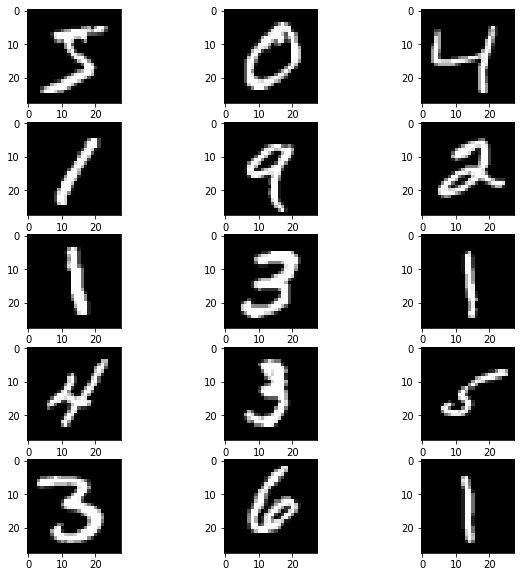

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
c = 0
for x in range(5):
    for y in range(3):
        plt.subplot(5,3,c+1)
        plt.imshow(x_train[c], cmap='gray')
        c+=1
plt.show()
print(y_train[:15])


In [ ]:
## 5층 설계 
# initializer = tf.keras.initializers.HeNormal()
# 모델 레이어 설정
basic_model_5 = tf.keras.models.Sequential([
  #x_train.shape[1] is 28 x 28 2d array. To input these values to input layer, I'll flatten this to number of 784(28 x 28) values
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  # in this case, we have to update number of 784(from input) * 256(number of weights) + 256(number of biases) parameters.
  tf.keras.layers.Dropout(0.6),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.6),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.6),
  # for the multi classification(classifying 0 ~ 9 digits), I use softmax activatoin function.
  tf.keras.layers.Dense(10, activation='softmax')
])

# 옵티마이저와 손실함수를 설정하고 정확도 매트릭스가 나오게 컴파일
basic_model_5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
         
# 모델의 모습을 표로 출력
basic_model_5.summary()
# 위의 레이어를 가진 모델로 5번 학습시킴
history_five_layers_model = basic_model_5.fit(x_train, y_train, epochs=30, validation_split=0.2)
# 검증을 해봄
print(basic_model_5.evaluate(x_test, y_test))
# overfitting validation
plt.plot(history_five_layers_model.history['loss'])
plt.plot(history_five_layers_model.history['val_loss'])

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 flatten_63 (Flatten)        (None, 15488)             0         
                                                                 
 dense_229 (Dense)           (None, 64)              

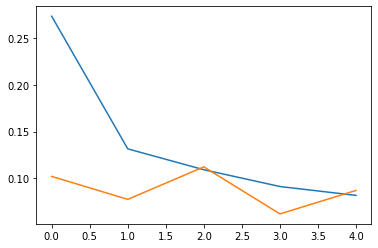

In [ ]:
# Conv, Pooling 레이어를 추가한 후 Dense 레이어가 들어간 모델
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=64),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)), 
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=32),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# 옵티마이저와 손실함수를 설정하고 정확도 매트릭스가 나오게 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
         
# 모델의 모습을 표로 출력
model.summary()
     
# 위의 레이어를 가진 모델로 5번 학습시킴
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# 검증을 해봄
print(model.evaluate(x_test, y_test))

# overfitting validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 23, 23, 32)        18464     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 20, 20, 16)        4624      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 19, 19, 16)     

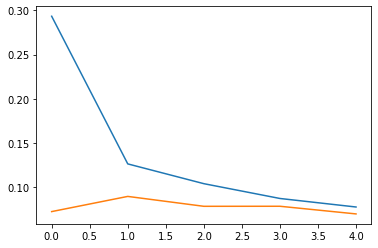

In [116]:
# Conv, Pooling 레이어를 추가한 후 Dense 레이어가 들어간 모델
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=64),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)), 
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=32),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)), 
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=16),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)), 
    
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# 옵티마이저와 손실함수를 설정하고 정확도 매트릭스가 나오게 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
         
# 모델의 모습을 표로 출력
model.summary()
     
# 위의 레이어를 가진 모델로 5번 학습시킴
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# 검증을 해봄
print(model.evaluate(x_test, y_test))

# overfitting validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 32)       0

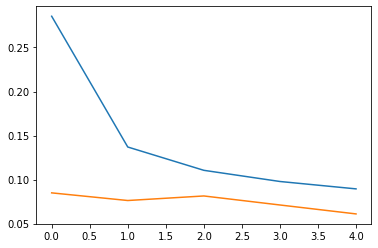

In [4]:
# Conv, Pooling 레이어를 추가한 후 Dense 레이어가 들어간 모델
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=64),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)), 
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=32),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)), 
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=32),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)), 
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=32),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)), 
    
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# 옵티마이저와 손실함수를 설정하고 정확도 매트릭스가 나오게 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
         
# 모델의 모습을 표로 출력
model.summary()
     
# 위의 레이어를 가진 모델로 5번 학습시킴
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# 검증을 해봄
print(model.evaluate(x_test, y_test))

# overfitting validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 25, 25, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 22, 22, 64)       

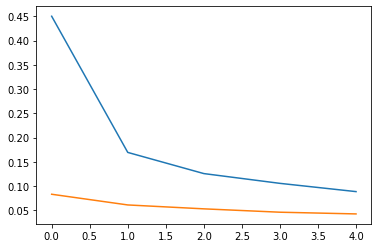

In [6]:
# Conv, Pooling 레이어를 추가한 후 Dense 레이어가 들어간 모델
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=64, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=64, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=64, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=64, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=64, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)), 
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# 옵티마이저와 손실함수를 설정하고 정확도 매트릭스가 나오게 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
         
# 모델의 모습을 표로 출력
model.summary()
     
# 위의 레이어를 가진 모델로 5번 학습시킴
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# 검증을 해봄
print(model.evaluate(x_test, y_test))

# overfitting validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])